In [1]:
# name etc

In [2]:
# imports
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [3]:
class rungmx:
    def s1hbonds(self, groupOne, groupTwo, fileout):
        string = 'echo ' + groupOne + " " + groupTwo
        string += '| gmx hbond -f simOne/OLysRNA_s500_nj.xtc  -s simOne/topol.tpr  -n simOne/indexFinal.ndx -num '
        string += fileout
        os.system(string)
    def s1sasa(self, group, fileout):
        string = 'echo ' + group +' | '
        string += 'gmx sasa -f simOne/OLysRNA_s500_nj.xtc -s simOne/*tpr -n simOne/*ndx -o ' 
        string += fileout + '_o.xvg -oa ' + fileout + '_oa.xvg'
        os.system(string)

In [4]:
# files, variables


# run gromacs commands
# gmx make_ndx -f struct.gro  -n index.ndx -o indexFinal.ndx < atominput
#   then make appropreate groups
# process s500 to nojump
#os.system('echo 0 | gmx trjconv -f simOne/OLysRNA_s500.xtc -s simOne/topol.tpr -o simOne/OLysRNA_s500_nj.xtc  -pbc nojump')
r = rungmx()
'''
r.s1hbonds(groupOne='22', groupTwo='33', fileout='simOne/hbond/wtpn_num.xvg')
r.s1hbonds(groupOne='11', groupTwo='34', fileout='simOne/hbond/ptn_num.xvg')
r.s1hbonds(groupOne='35', groupTwo='67', fileout='simOne/hbond/rna1tap_num.xvg')
r.s1hbonds(groupOne='36', groupTwo='68', fileout='simOne/hbond/rna2tap_num.xvg')
r.s1hbonds(groupOne='67', groupTwo='67', fileout='simOne/hbond/aptap.xvg')
r.s1hbonds(groupOne='34', groupTwo='34', fileout='simOne/hbond/nuctnuc.xvg')
'''


"\nr.s1hbonds(groupOne='22', groupTwo='33', fileout='simOne/hbond/wtpn_num.xvg')\nr.s1hbonds(groupOne='11', groupTwo='34', fileout='simOne/hbond/ptn_num.xvg')\nr.s1hbonds(groupOne='35', groupTwo='67', fileout='simOne/hbond/rna1tap_num.xvg')\nr.s1hbonds(groupOne='36', groupTwo='68', fileout='simOne/hbond/rna2tap_num.xvg')\nr.s1hbonds(groupOne='67', groupTwo='67', fileout='simOne/hbond/aptap.xvg')\nr.s1hbonds(groupOne='34', groupTwo='34', fileout='simOne/hbond/nuctnuc.xvg')\n"

In [5]:


class graphin: 
    # returns array from xvg
    def processdatatoarray(self, filename, column=1, skip=24, smooth=False, stabalise=False):
        xvgout = pd.read_csv(filename, skiprows=skip, delim_whitespace=True)
        array = xvgout.to_numpy()
        
        average = []
        values = np.zeros(shape=(len(array)))
        for ii in range(len(array)):
            values[ii] = array[ii][column]
            if smooth is False:
                average.append(values[ii])
            else:
                if ii >= smooth and ii <= (len(array) - smooth):
                    av = 0
                    for jj in range (ii-smooth, ii+smooth, 1):
                        av += (array[jj][column])
                    if stabalise is True:
                        stab = 0
                        if array[0][column] > array[-1][column]:
                            stab = array[0][column]
                        else:
                            stab = array[-1][column]
                        average.append(av/smooth/stab)
                    else:
                        average.append(av/(2*smooth))
        return average
    
    # graphs things
    def graphnow(self, arrays, yaxis, xaxis="time (ns)", colour='-b'):
        plt.plot(arrays, colour)
        plt.xlabel(xaxis)
        plt.ylabel(yaxis)
        plt.savefig("images/" + yaxis + ".png",dpi=300)
        plt.show()


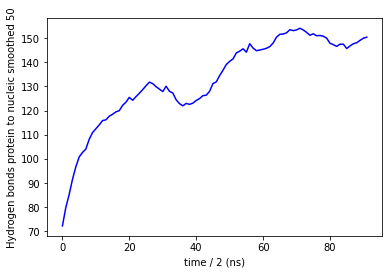

'derivative = np.zeros(shape=(len(array)-1))\nxvalue = []\nfor ii in range(len(array)-1):\n    xvalue.append(ii*2)\n    derivative[ii] = (- array[ii+1] + array[ii]) / (-(ii+1)*2 + (ii*2))\n    \nprint(derivative)'

In [6]:
g = graphin()
array = g.processdatatoarray("simOne/hbond/ptn_num.xvg", smooth=5, stabalise=False)
g.graphnow(array, yaxis="Hydrogen bonds protein to nucleic smoothed 50", xaxis="time / 2 (ns)")
'''derivative = np.zeros(shape=(len(array)-1))
xvalue = []
for ii in range(len(array)-1):
    xvalue.append(ii*2)
    derivative[ii] = (- array[ii+1] + array[ii]) / (-(ii+1)*2 + (ii*2))
    
print(derivative)'''



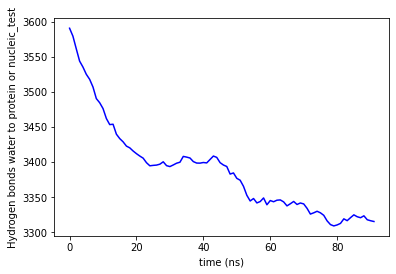

In [7]:
g = graphin()
array = g.processdatatoarray('simOne/hbond/wtpn_num.xvg', smooth=5, stabalise=False)
g.graphnow(array, yaxis="Hydrogen bonds water to protein or nucleic_test")

In [8]:
array1 = g.processdatatoarray("simOne/hbond/ptn_num.xvg", smooth = 5, stabalise=False)
array2 = g.processdatatoarray("simOne/hbond/rna1tap_num.xvg", smooth = 5, stabalise=False)
array3 = g.processdatatoarray("simOne/hbond/rna2tap_num.xvg", smooth = 5, stabalise=False)

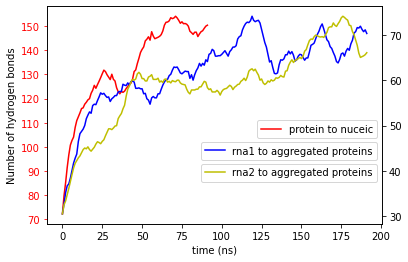

In [9]:
# plot two on two axi

fig, ax = plt.subplots()
plt.plot(array1, '-r', label="protein to nuceic")
plt.legend()
plt.legend( bbox_to_anchor=(1, 0.5))
ax.tick_params('y', colors='b')
plt.xlabel('time (ns)')
plt.ylabel('Number of hydrogen bonds')

ax2 = ax.twinx()
plt.plot(array2, '-b', label="rna1 to aggregated proteins")
plt.legend( bbox_to_anchor=(1, 0.4))
#plt.axis('off')
ax.tick_params('y', colors='r')

ax3 = ax.twinx()
plt.plot(array3, '-y', label="rna2 to aggregated proteins")
plt.legend( bbox_to_anchor=(1, 0.3))
plt.axis('off')


plt.savefig("images/hb_pn rna1ap rna2ap_test.png",dpi=300)

In [15]:
r = rungmx()
#r.s1sasa(group='33', fileout='simOne/sasa/sasapn')


In [16]:
array1 = g.processdatatoarray('simOne/sasa/sasapn_o.xvg', column=1, skip=24, smooth=5, stabalise=False)
#g.graphnow(array, yaxis="SASA (nm\\S2\\N)", xaxis="time / 2 (ns)")
array2 = g.processdatatoarray('simOne/hbond/wtpn_num.xvg', smooth=5, stabalise=False)
#g.graphnow(array, yaxis="Hydrogen bonds water to protein or nucleic_test")

[]

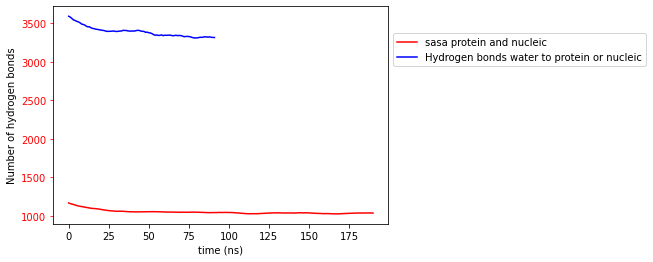

In [24]:
# plot two on two axi

fig, ax = plt.subplots()
plt.plot(array1, '-r', label="sasa protein and nucleic")
plt.xlabel("time (ns)")
plt.legend()
plt.legend( bbox_to_anchor=(1, 1))
ax.tick_params('y', colors='b')
plt.xlabel('time (ns)')
plt.ylabel('SASA (nm\\S2\\N)')

r.s1hbonds(groupOne='22', groupTwo='33', fileout='simOne/hbond/wtpn_num.xvg')
plt.plot(array2, '-b', label="Hydrogen bonds water to protein or nucleic")
plt.legend( bbox_to_anchor=(1, 0.9))
#plt.axis('off')
plt.ylabel('Number of hydrogen bonds')
ax.tick_params('y', colors='r')



plt.savefig("images/hb_sasa_pn_wtpn_test.png",dpi=300)
plt.plot()



[]

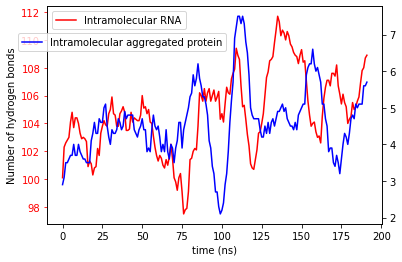

In [13]:
array1 = g.processdatatoarray('simOne/hbond/nuctnuc.xvg', smooth=5, stabalise=False)
#g.graphnow(array1, yaxis="Intramolecular hydrogen bonds RNA")
array2 = g.processdatatoarray('simOne/hbond/aptap.xvg', smooth=5, stabalise=False)
#g.graphnow(array2, yaxis="Intramolecular hydrogen bonds aggregated protein")

fig, ax = plt.subplots()
plt.plot(array1, '-r', label="Intramolecular RNA")
plt.xlabel("time (ns)")
plt.legend()
#plt.legend( bbox_to_anchor=(0.7, 0.9))
ax.tick_params('y', colors='b')
plt.xlabel('time (ns)')
plt.ylabel('Number of hydrogen bonds')

ax2 = ax.twinx()
plt.plot(array2, '-b', label="Intramolecular aggregated protein")
plt.legend( bbox_to_anchor=(0.55, 0.9))
#plt.axis('off')
ax.tick_params('y', colors='r')



plt.savefig("images/intramol_test.png",dpi=300)
plt.plot()

